In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

### Exercise 1

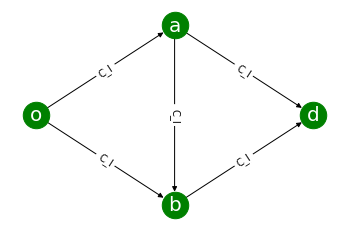

In [2]:
G = nx.DiGraph()
G.add_node('o', pos=(0,0))
G.add_node('a', pos=(2,2))
G.add_node('b', pos=(2,-2))
G.add_node('d', pos=(4,0))
G.add_edge('o','a', capacity='C_l')
G.add_edge('o','b', capacity='C_l')
G.add_edge('a','b', capacity='C_l')
G.add_edge('a','d', capacity='C_l')
G.add_edge('b','d', capacity='C_l')
pos=nx.get_node_attributes(G,'pos')
nx.draw_networkx_edge_labels(G,pos,edge_labels={('o','a'):'C_l', 
                                                ('o','b'):'C_l',
                                                ('a','b'):'C_l',
                                                ('a','d'):'C_l',
                                                ('b','d'):'C_l'})
nx.draw(G, pos, with_labels = True, font_color='white', node_color='green', node_size=700, font_size=20)

**a) We want to know what is the minimum amount of capacity to remove from this network to disconnect the destination from the origin.**

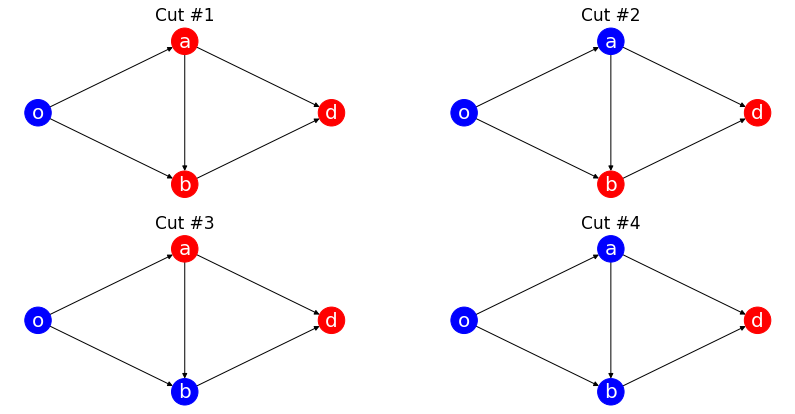

In [3]:
fig = plt.figure(1, figsize=(14,7))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.set_title("Cut #1", fontsize = 17)
ax2.set_title("Cut #2", fontsize = 17)
ax3.set_title("Cut #3", fontsize = 17)
ax4.set_title("Cut #4", fontsize = 17)

cuts = G

cut1 = ['blue', 'red', 'red', 'red']
cut2 = ['blue', 'blue', 'red', 'red']
cut3 = ['blue', 'red', 'blue', 'red'] 
cut4 = ['blue', 'blue', 'blue', 'red']
nx.draw(cuts, pos, with_labels = True, font_color='white', node_color=cut1, node_size=700, font_size=20, ax=ax1)
nx.draw(cuts, pos, with_labels = True, font_color='white', node_color=cut2, node_size=700, font_size=20, ax=ax2)
nx.draw(cuts, pos, with_labels = True, font_color='white', node_color=cut3, node_size=700, font_size=20, ax=ax3)
nx.draw(cuts, pos, with_labels = True, font_color='white', node_color=cut4, node_size=700, font_size=20, ax=ax4)

In [4]:
G['o']['a']['capacity'] = 1
G['a']['d']['capacity'] = 1
G['o']['b']['capacity'] = 1
G['b']['d']['capacity'] = 1
G['a']['b']['capacity'] = 1
print("maximum flow: ", nx.algorithms.flow.maximum_flow(G,'o','d'))
print("minimum cut", nx.algorithms.flow.minimum_cut(G,'o','d'))

maximum flow:  (2, {'o': {'a': 1, 'b': 1}, 'a': {'b': 0, 'd': 1}, 'b': {'d': 1}, 'd': {}})
minimum cut (2, ({'o', 'b', 'a'}, {'d'}))


To perform this operation we analize all the possible cut and the relative capacity. Then, applying the max-flow min-cut theorem we know that the maximum throughput from o to d is equal to the minimum capacity among all the cuts.

The cuts of the network are:
- CUT #1: $U=\{o\},    U^C=\{a,b,d\}$, capacity = 2C_l
- CUT #2: $U=\{o,a\},  U^C=\{b,d\}$,   capacity = 3C_l
- CUT #3: $U=\{o,b\},  U^C=\{a,d\}$,   capacity = 2C_l 
- CUT #4: $U=\{o,a,b\},U^C=\{d\}$,     capacity = 2C_l

So the minimum total capacity to be removed for no feasible unitary flow from o to d to exits is 2C_l.

**b) Assume that the link capacities are:**

**C1 = C4 = 3; C2 = C3 = C5 = 2:**

**Where should 1 unit of additional capacity be allocated in order to maximize the feasible
throughput from o to d? What is the maximal throughput?**

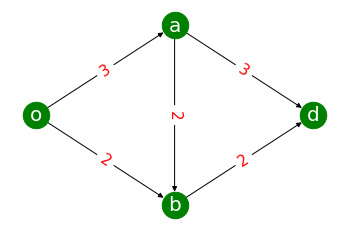

In [5]:
DG = nx.DiGraph()
DG.add_node('o', pos=(0,0))
DG.add_node('a', pos=(2,2))
DG.add_node('b', pos=(2,-2))
DG.add_node('d', pos=(4,0))
DG.add_edges_from([('o', 'a'), ('a', 'd')], capacity=3)
DG.add_edges_from([('o', 'b'), ('a', 'b'), ('b', 'd')], capacity=2)
nx.draw_networkx_edge_labels(DG,pos,edge_labels={('o','a'):DG['o']['a']['capacity'], 
                                                 ('a','d'):DG['a']['d']['capacity'],
                                                 ('o','b'):DG['o']['b']['capacity'],
                                                 ('b','d'):DG['b']['d']['capacity'],
                                                 ('a','b'):DG['a']['b']['capacity']},
                             font_size=15, font_color='red') 

pos=nx.get_node_attributes(DG,'pos')

nx.draw(DG, pos, with_labels = True, font_color='white', node_color='green', node_size=700, font_size=20)

We analyze as before the cuts in the nertwork to understand in this configuration what is the maximum throughput:
- CUT #1: $U=\{o\},    U^C=\{a,b,d\}$, capacity = 3+2 = 5
- CUT #2: $U=\{o,a\},  U^C=\{b,d\}$,   capacity = 2+2+3 = 7
- CUT #3: $U=\{o,b\},  U^C=\{a,d\}$,   capacity = 3+2 = 5 
- CUT #4: $U=\{o,a,b\},U^C=\{d\}$,     capacity = 3+2 = 5

In [6]:
#def draw_capacity_labels():
#    nx.draw_networkx_edge_labels(cuts,pos,edge_labels={('o','a'):DG['o']['a']['capacity'], 
#                                                   ('a','d'):DG['a']['d']['capacity'],
#                                                   ('o','b'):DG['o']['b']['capacity'],
#                                                   ('b','d'):DG['b']['d']['capacity'],
#                                                   ('a','b'):DG['a']['b']['capacity']},
#                                                   font_size=15, font_color='red') 

In [25]:
def draw_capacity_labels(G=DG):
    nx.draw_networkx_edge_labels(cuts,pos,edge_labels={('o','a'):G['o']['a']['capacity'], 
                                                   ('a','d'):G['a']['d']['capacity'],
                                                   ('o','b'):G['o']['b']['capacity'],
                                                   ('b','d'):G['b']['d']['capacity'],
                                                   ('a','b'):G['a']['b']['capacity']},
                                                   font_size=15, font_color='red') 

maximum flow:  (5, {'o': {'a': 3, 'b': 2}, 'a': {'d': 3, 'b': 0}, 'b': {'d': 2}, 'd': {}})
minimum cut (5, ({'o', 'b', 'a'}, {'d'}))


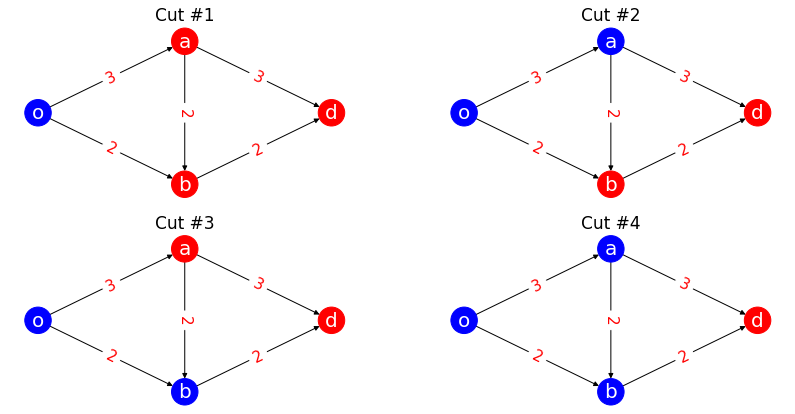

In [26]:
fig = plt.figure(1, figsize=(14,7))

ax1 = fig.add_subplot(221)
draw_capacity_labels()
ax2 = fig.add_subplot(222)
draw_capacity_labels()
ax3 = fig.add_subplot(223)
draw_capacity_labels()
ax4 = fig.add_subplot(224)
draw_capacity_labels()

ax1.set_title("Cut #1", fontsize = 17)
ax2.set_title("Cut #2", fontsize = 17)
ax3.set_title("Cut #3", fontsize = 17)
ax4.set_title("Cut #4", fontsize = 17)

cuts = DG

cut1 = ['blue', 'red', 'red', 'red']
cut2 = ['blue', 'blue', 'red', 'red']
cut3 = ['blue', 'red', 'blue', 'red'] 
cut4 = ['blue', 'blue', 'blue', 'red']
nx.draw(cuts, pos, with_labels = True, font_color='white', node_color=cut1, node_size=700, font_size=20, ax=ax1)
nx.draw(cuts, pos, with_labels = True, font_color='white', node_color=cut2, node_size=700, font_size=20, ax=ax2)
nx.draw(cuts, pos, with_labels = True, font_color='white', node_color=cut3, node_size=700, font_size=20, ax=ax3)
nx.draw(cuts, pos, with_labels = True, font_color='white', node_color=cut4, node_size=700, font_size=20, ax=ax4)

print("maximum flow: ", nx.algorithms.flow.maximum_flow(DG,'o','d'))
print("minimum cut", nx.algorithms.flow.minimum_cut(DG,'o','d'))

Now we need to decide where add 1 unit of capacity to maximize the feasible flow. 

If we add some capacity the role of the min-cut can played by a different cut. It is preferable to add 1 unit of capacity to the most shared link between the cuts with lowest capacity. In this case there is not a unique link shared among the CUT #1, CUT #3 and CUT #4.

The addition of a single unit of capacity will not change the maximum throughput because adding 1 unit of capacity in any link does not modify the minimum capacity which remains 5.

However not all the additions are equals. 

In fact, if we add 1 unit to link e1 (o-a) we increase the capacity on both CUT #1 and CUT #3 (but not on CUT #4 with capacity = 5). 

In the same way, adding 1 unit to link e5 (b-d) we increase to 6 the capacity of CUT #4 and CUT #3, but CUT #1 remains with capacity=5.

**(c) Consider link capacities at initial point b. Where should 2 units of additional capacity be allocated in order to maximize the feasible throughput from o to d? Compute all the optimal capacity allocations for this case and the optimal throughput.**

In [8]:
#list_edges = list(dict(DG.copy().edges()).keys())
#list_edges.extend(list(itertools.combinations(list_edges,2)))

I need to define some useful function in order to allocate the additional units and compute which are the optimal flow allocations.

In [9]:
# I pass a graph, the origin and the destination to compute the edges, the maximum flow and the minimum cut.
# I want to print the edges since I need to check if the units are effectively allocated on the graph.
def print_dict_max_flow_min_cut(graph, orig, dest):
        print("network edges: ", dict(graph.edges))
        print("maximum flow: ", nx.algorithms.flow.maximum_flow(graph, orig, dest))
        print("minimum cut", nx.algorithms.flow.minimum_cut(graph, orig, dest))
        print("")

# Function to extract the head and tail values
def head_tail(pair):
    head, tail = pair
    return head, tail

# Here I define a function with the following parameters:
# 1. tmp_graph: the graph to which I want to add the units
# 2. tuples: tuples contains the array with the length of the tuples containing the edges
# 3. unit: the additional unit to add to a given edge
# 4. allocation_set: the list which contains the possible allocations of units
# 5. e: the edge that I am considering in that moment
def add_capacity(tmp_graph, tuples, unit, allocation_set, e, idx): 
    print(f"{idx+1})")
    # I iterate over the elements in the allocation_set
    for i, t in enumerate(tuples):      
        
        # first case: I want to add all the capacity over a single link:
        # link1:  o->a +2
        if np.shape(allocation_set)[0]==1 and np.shape(allocation_set)[1]==1:
            #print("first case")
            print(f"link{i+1}: ", e[0] + "->" + e[1] + " +" + str(unit[i]))
            tmp_graph[e[0]][e[1]]['capacity'] += unit[i]
            break
        
        # second case: I have multiple links and I have also multiple possible allocations
        if np.shape(allocation_set)[0]>1 and np.shape(allocation_set)[1]>1:
            #print("second case")
            head, tail = head_tail(e[i])
            #print("edge second case", e)
            #print("head, tail", head, tail)
            print(f"link{i+1}: ", head + "->" + tail + " +" + str(unit[i]))
            tmp_graph[head][tail]['capacity'] += unit[i] 
            
        # third case: I have multiple links but a single possible allocation
        # link1:  o->b +1
        # link2:  a->b +1
        if np.shape(allocation_set)[0]==1 and np.shape(allocation_set)[1]>1:
            #print("third case")
            print(f"link{i+1}: ", e[i][0] + "->" + e[i][1] + " +" + str(unit[i]))
            tmp_graph[e[i][0]][e[i][1]]['capacity'] += unit[i]

    print_dict_max_flow_min_cut(tmp_graph, 'o','d') 

def add_capacity_compute_max_throughput(list_edges, one_edge=None, two_edge=None, three_edge=None, four_edge=None):
    for idx, edge in enumerate(list_edges):

        # compute the lenght of the tuple
        tuples = [len(a) for a in edge]

        # One edge
        if np.size(edge)==2:
            for comb in one_edge:
                tmp_graph = DG.copy()
                add_capacity(tmp_graph, tuples, comb, one_edge, edge, idx)

        # Two edges
        if np.size(edge)==4: 
            for comb in two_edge:
                tmp_graph = DG.copy()
                add_capacity(tmp_graph, tuples, comb, two_edge, edge, idx)

        # Three edges
        if np.size(edge)==6: 
            for comb in three_edge:
                tmp_graph = DG.copy()     
                add_capacity(tmp_graph, tuples, comb, three_edge, edge, idx)

        # Four edges
        if np.size(edge)==8: 
            #print(edge)
            for comb in four_edge:
                tmp_graph = DG.copy()
                add_capacity(tmp_graph, tuples, comb, four_edge, edge, idx)

In [10]:
# Since I can allocate at most 2 units of flow, these are the possible allocations
one_edge = [[2]]
two_edge = [[1,1]]

# I compute all the possible combinations of edges over which allocate the 2 additional units
list_edges = list(dict(DG.copy().edges()).keys())
list_edges.extend(list(itertools.combinations(list_edges,2)))

add_capacity_compute_max_throughput(list_edges, one_edge, two_edge)

1)
link1:  o->a +2
network edges:  {('o', 'a'): {'capacity': 5}, ('o', 'b'): {'capacity': 2}, ('a', 'd'): {'capacity': 3}, ('a', 'b'): {'capacity': 2}, ('b', 'd'): {'capacity': 2}}
maximum flow:  (5, {'o': {'a': 5, 'b': 0}, 'a': {'d': 3, 'b': 2}, 'b': {'d': 2}, 'd': {}})
minimum cut (5, ({'o', 'b', 'a'}, {'d'}))

2)
link1:  o->b +2
network edges:  {('o', 'a'): {'capacity': 3}, ('o', 'b'): {'capacity': 4}, ('a', 'd'): {'capacity': 3}, ('a', 'b'): {'capacity': 2}, ('b', 'd'): {'capacity': 2}}
maximum flow:  (5, {'o': {'a': 3, 'b': 2}, 'a': {'d': 3, 'b': 0}, 'b': {'d': 2}, 'd': {}})
minimum cut (5, ({'o', 'b', 'a'}, {'d'}))

3)
link1:  a->d +2
network edges:  {('o', 'a'): {'capacity': 3}, ('o', 'b'): {'capacity': 2}, ('a', 'd'): {'capacity': 5}, ('a', 'b'): {'capacity': 2}, ('b', 'd'): {'capacity': 2}}
maximum flow:  (5, {'o': {'a': 3, 'b': 2}, 'a': {'d': 3, 'b': 0}, 'b': {'d': 2}, 'd': {}})
minimum cut (5, ({'o', 'b'}, {'d', 'a'}))

4)
link1:  a->b +2
network edges:  {('o', 'a'): {'capac

The optimal allocations are the following:

- 1) link1: o->a +1, link2: a->d +1 
- 2) link1: o->a +1, link2: b->d +1 
- 3) link1: o->b +1, link2: b->d +1 

In all the three cases we reach a maximum throughput equal to 6, so improving of 1 the previous maximum throughput of 5.

**(d) Where should 4 units of additional capacity be allocated in order to maximize the feasible throughput from o to d? Compute all the optimal capacity allocations for this case. Among the optimal allocations, select the allocation that maximizes the sum of the cut capacities.**

In [11]:
list_edges = list(dict(DG.copy().edges()).keys())
list_edges_init = list_edges.copy()
list_edges.extend(list(itertools.combinations(list_edges_init,2)))
list_edges.extend(list(itertools.combinations(list_edges_init,3)))
list_edges.extend(list(itertools.combinations(list_edges_init,4)))
#list_edges

In [12]:
one_edge = [[4]]
two_edge = [[2,2],[1,3],[3,1]]
three_edge = [[1,1,2],[1,2,1],[2,1,1]]
four_edge = [[1, 1, 1, 1]]

add_capacity_compute_max_throughput(list_edges, one_edge, two_edge, three_edge, four_edge)

1)
link1:  o->a +4
network edges:  {('o', 'a'): {'capacity': 7}, ('o', 'b'): {'capacity': 2}, ('a', 'd'): {'capacity': 3}, ('a', 'b'): {'capacity': 2}, ('b', 'd'): {'capacity': 2}}
maximum flow:  (5, {'o': {'a': 5, 'b': 0}, 'a': {'d': 3, 'b': 2}, 'b': {'d': 2}, 'd': {}})
minimum cut (5, ({'o', 'b', 'a'}, {'d'}))

2)
link1:  o->b +4
network edges:  {('o', 'a'): {'capacity': 3}, ('o', 'b'): {'capacity': 6}, ('a', 'd'): {'capacity': 3}, ('a', 'b'): {'capacity': 2}, ('b', 'd'): {'capacity': 2}}
maximum flow:  (5, {'o': {'a': 3, 'b': 2}, 'a': {'d': 3, 'b': 0}, 'b': {'d': 2}, 'd': {}})
minimum cut (5, ({'o', 'b', 'a'}, {'d'}))

3)
link1:  a->d +4
network edges:  {('o', 'a'): {'capacity': 3}, ('o', 'b'): {'capacity': 2}, ('a', 'd'): {'capacity': 7}, ('a', 'b'): {'capacity': 2}, ('b', 'd'): {'capacity': 2}}
maximum flow:  (5, {'o': {'a': 3, 'b': 2}, 'a': {'d': 3, 'b': 0}, 'b': {'d': 2}, 'd': {}})
minimum cut (5, ({'o', 'b'}, {'d', 'a'}))

4)
link1:  a->b +4
network edges:  {('o', 'a'): {'capac

The optimal assignment of 4 units of flows are:

- 1) o->b +2, b->d +2 (case 12)           
- 2) o->a +1, o->b +1, b->d +2 (case 18)
- 3) o->a +2, a->d +1, b->d +1 (case 20)
- 2) o->a +1, o->b +1, a->d +1, b->d +1 (case 27)   

In all these cases the maximum throughput is 7.

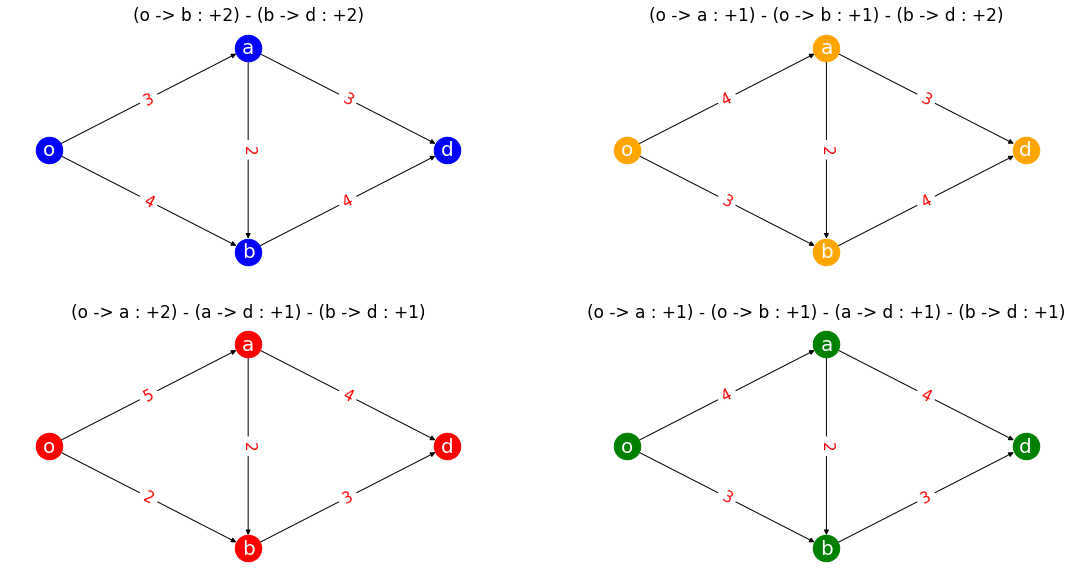

In [52]:
fig = plt.figure(1, figsize=(19,10))

graph1 = DG.copy()
graph1['o']['b']['capacity'] = 4
graph1['b']['d']['capacity'] = 4

graph2 = DG.copy()
graph2['o']['a']['capacity'] = 4
graph2['o']['b']['capacity'] = 3
graph2['b']['d']['capacity'] = 4

graph3 = DG.copy()
graph3['o']['a']['capacity'] = 5
graph3['a']['d']['capacity'] = 4
graph3['b']['d']['capacity'] = 3

graph4 = DG.copy()
graph4['o']['a']['capacity'] = 4
graph4['o']['b']['capacity'] = 3
graph4['a']['d']['capacity'] = 4
graph4['b']['d']['capacity'] = 3

ax1 = fig.add_subplot(221)
draw_capacity_labels2(graph1)
ax2 = fig.add_subplot(222)
draw_capacity_labels2(graph2)
ax3 = fig.add_subplot(223)
draw_capacity_labels2(graph3)
ax4 = fig.add_subplot(224)
draw_capacity_labels2(graph4)

ax1.set_title("(o -> b : +2) - (b -> d : +2)", fontsize = 17)
ax2.set_title("(o -> a : +1) - (o -> b : +1) - (b -> d : +2)", fontsize = 17)
ax3.set_title("(o -> a : +2) - (a -> d : +1) - (b -> d : +1)", fontsize = 17)
ax4.set_title("(o -> a : +1) - (o -> b : +1) - (a -> d : +1) - (b -> d : +1)", fontsize = 17)

cut2 = ['blue', 'blue', 'red', 'red']
cut3 = ['blue', 'red', 'blue', 'red'] 
cut4 = ['blue', 'blue', 'blue', 'red']
nx.draw(graph1, pos, with_labels = True, font_color='white', node_color='blue', node_size=700, font_size=20, ax=ax1)
nx.draw(graph2, pos, with_labels = True, font_color='white', node_color='orange', node_size=700, font_size=20, ax=ax2)
nx.draw(graph3, pos, with_labels = True, font_color='white', node_color='red', node_size=700, font_size=20, ax=ax3)
nx.draw(graph4, pos, with_labels = True, font_color='white', node_color='green', node_size=700, font_size=20, ax=ax4)

All the sum of the cuts in the four graph is equal to 30.